## Online Shopping Sales Analysis

Read the data and solve the following questions to get meaningful insights

<br>**User_ID** : User id
<br>**Product_ID** : Product id
<br>**Gender** : Customer's gender
<br>**Age** : Customer's age
<br>**Occupation** : Customer's occupation
<br>**City_Category** : Three types of cities with different spending capacity
<br>**Stay_In_Current_City_Years** : Amount of years a customer has stayed in a particular city
<br>**Marital_Status** : Marital status of the customer
<br>**Product_Category_1** : Eighteen types of the cloth products
<br>**Purchase** : Was the product purchased or not purchased

### Read the data

In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

In [2]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu b

In [3]:
!tar xf spark-3.3.1-bin-hadoop3.tgz
!pip install -q findspark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 20.6 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=6ce69e466ba93f7716d1834ebd6fdf8163411d09a84bc627f7fb7fe779897c36
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [4]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

In [5]:
import findspark
findspark.init()
findspark.find()

'/content/spark-3.3.1-bin-hadoop3'

In [6]:
from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F
from pyspark import SparkFiles

spark = SparkSession \
       .builder \
       .appName("Our Second Spark example") \
       .getOrCreate()

spark

In [8]:
spark=SparkSession.builder.getOrCreate()
## ensure to use the link of the raw file of the csv
url = "https://raw.githubusercontent.com/VAKGL/SparkML-and-SparkSQL/main/SparkSQL/salesdatatrain.csv" # Make sure the url is the raw version of the file on GitHub


In [9]:
spark.sparkContext.addFile(url)

In [11]:
# Reading the downloaded content and turning it into a pandas dataframe

rawDF = spark.read.csv(SparkFiles.get("salesdatatrain.csv"),inferSchema=True, header= True)
rawDF.show()

+-------+----------+------+-----+----------+-------------+--------------------------+--------------+------------------+--------+
|User_ID|Product_ID|Gender|  Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Purchase|
+-------+----------+------+-----+----------+-------------+--------------------------+--------------+------------------+--------+
|1000001| P00069042|     F| 0-17|        10|            A|                         2|             0|                 3|    8370|
|1000001| P00248942|     F| 0-17|        10|            A|                         2|             0|                 1|   15200|
|1000001| P00087842|     F| 0-17|        10|            A|                         2|             0|                12|    1422|
|1000001| P00085442|     F| 0-17|        10|            A|                         2|             0|                12|    1057|
|1000002| P00285442|     M|  55+|        16|            C|                        4+|            

### Q. Print the number of rows and columns of the data

In [12]:
print("Number of Rows: ", rawDF.count())
print("Number of Columns", len(rawDF.columns))

Number of Rows:  550068
Number of Columns 10


### Q. Print schema and change column data types wherever necessary

In [13]:
rawDF.printSchema()

root
 |-- User_ID: integer (nullable = true)
 |-- Product_ID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Occupation: integer (nullable = true)
 |-- City_Category: string (nullable = true)
 |-- Stay_In_Current_City_Years: string (nullable = true)
 |-- Marital_Status: integer (nullable = true)
 |-- Product_Category_1: integer (nullable = true)
 |-- Purchase: integer (nullable = true)



The variables 'Occupation', 'Marital_Status', 'Product_Category_1' are read as integers but they are categorical columns. We will change the data types of these columns

In [14]:
from pyspark.sql.types import StringType
# typecast the variable 'Year' to stringtype 
rawDF = rawDF.withColumn("Occupation",rawDF["Occupation"].cast(StringType()))
# typecast the variable 'Organization Group Code' to stringtype
rawDF = rawDF.withColumn("Marital_Status",rawDF["Marital_Status"].cast(StringType()))
# typecast the variable 'Union Code' to stringtype
rawDF = rawDF.withColumn("Product_Category_1",rawDF["Product_Category_1"].cast(StringType()))

In [15]:
rawDF.printSchema()

root
 |-- User_ID: integer (nullable = true)
 |-- Product_ID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- City_Category: string (nullable = true)
 |-- Stay_In_Current_City_Years: string (nullable = true)
 |-- Marital_Status: string (nullable = true)
 |-- Product_Category_1: string (nullable = true)
 |-- Purchase: integer (nullable = true)



### Q. Check basic statistics

In [16]:
rawDF.describe().toPandas()

,summary,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,count,550068,550068,550068,550068,550068,550068,550068,550068,550068,550068
1,mean,1003028.8424013031,None,None,None,8.076706879876669,None,1.468494139793958,0.40965298835780306,5.404270017525106,9263.968712959126
2,stddev,1727.5915855310764,None,None,None,6.522660487341725,None,0.9890866807573131,0.49177012631732997,3.9362113692014105,5023.065393820572
3,min,1000001,P00000142,F,0-17,0,A,0,0,1,12
4,max,1006040,P0099942,M,55+,9,C,4+,1,9,23961


### Q. Which age group has the highest purchase share

In [17]:
from pyspark.sql.functions import avg 
rawDF.groupBy("Age").agg(avg("Purchase").alias("Average Purchase")).show(truncate=False)

+-----+-----------------+
|Age  |Average Purchase |
+-----+-----------------+
|18-25|9169.663606261289|
|26-35|9252.690632869888|
|0-17 |8933.464640444974|
|46-50|9208.625697468327|
|51-55|9534.808030960236|
|36-45|9331.350694917874|
|55+  |9336.280459449405|
+-----+-----------------+



Age group 51-55 has the highest purchase share across all the age groups

### Q. Plot the bar chart showing the distribution of Purchase according to the age group

<BarContainer object of 7 artists>

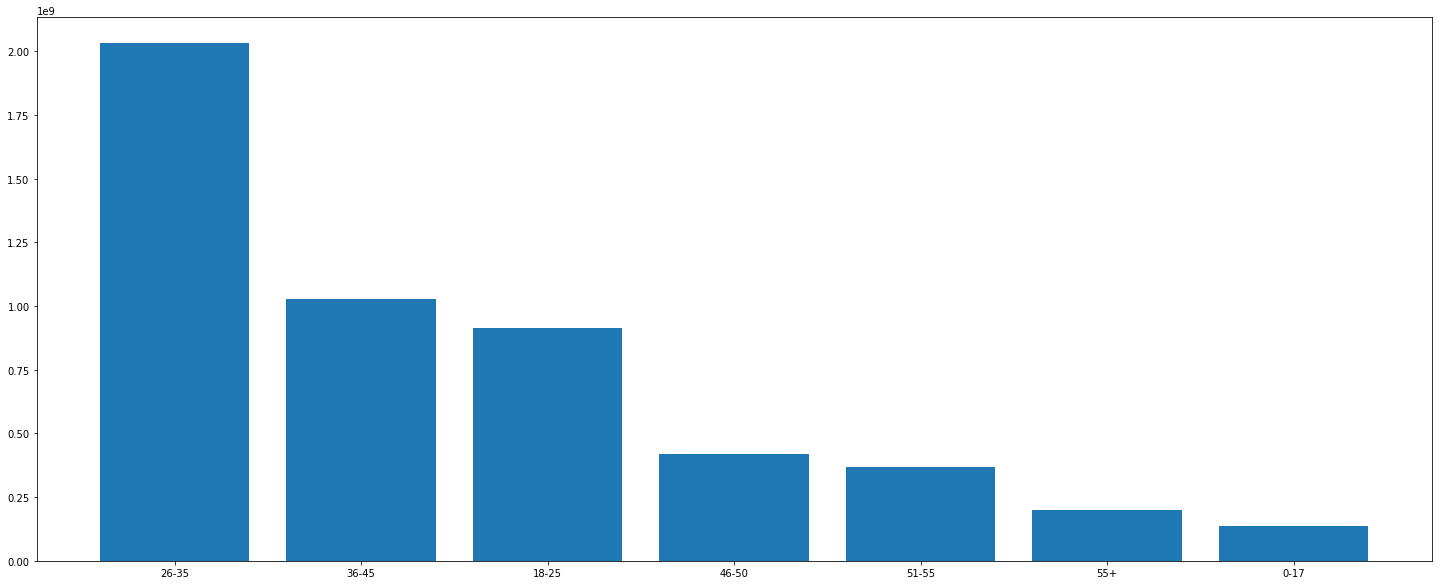

In [18]:
from pyspark.sql.functions import desc
fig = plt.figure(figsize =(25, 10))

ageDF = rawDF[['Age','Purchase']].groupby('Age').sum('Purchase').sort(desc("sum(Purchase)")).toPandas().head(10)
# display the top 10 organisation group 
plt.bar(ageDF["Age"], ageDF["sum(Purchase)"])

The age group 26-35 has the highest purchase count while the age group 6-7 has the lowest purchase

### Q. What is the gender ratio in the dataset

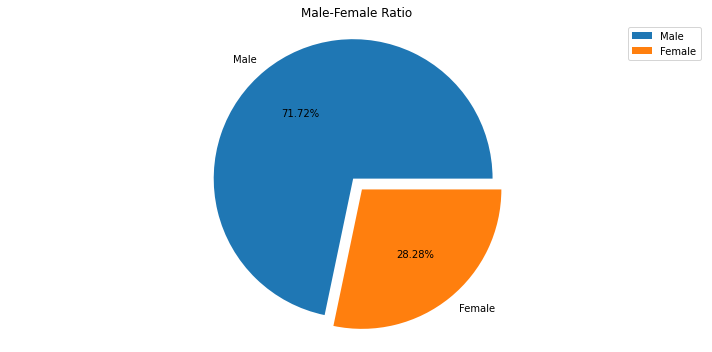

In [19]:
pdDF = rawDF.toPandas()
genderDF = pdDF[['User_ID','Gender']].drop_duplicates('User_ID')
fig1, ax1 = plt.subplots(figsize=(10,5))
# use value_counts for counting each categories
ax1.pie(genderDF['Gender'].value_counts(),labels=['Male','Female'],autopct='%1.2f%%',explode = (0.1,0))
plt.title("Male-Female Ratio")
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

There are more males than females in the dataset. The male constitutes 71.72 % of the total customers

### Q. What is the purchase amount ratio with respect to gender

<ipython-input-20-0670ce6853e5>:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax1.pie(genderpurchase[['Gender','sum(Purchase)']].groupby(by='Gender').sum(),labels=['Female','Male'],autopct='%1.2f%%',explode = (0.1,0))


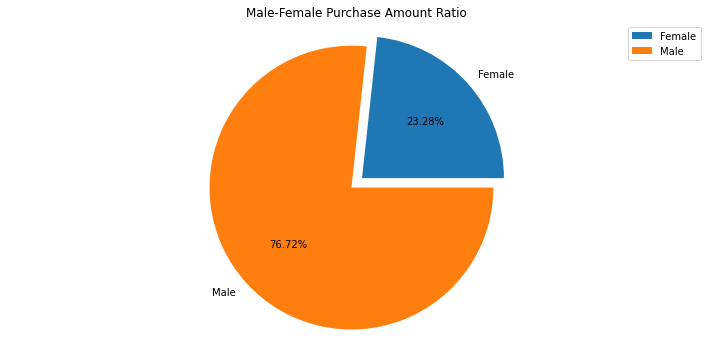

In [20]:
genderpurchase = rawDF.groupby('Gender').sum('Purchase').toPandas()

fig1, ax1 = plt.subplots(figsize=(10,5))
# use groupby with sum to get the purchase amount ratio
ax1.pie(genderpurchase[['Gender','sum(Purchase)']].groupby(by='Gender').sum(),labels=['Female','Male'],autopct='%1.2f%%',explode = (0.1,0))
plt.title("Male-Female Purchase Amount Ratio")
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

Since there are more males in the data, males have more purchase amount ratio than females

### Q. Get shopping summary of each city

In [21]:
from pyspark.sql.functions import sum, countDistinct
# apply countDistinct on City_Category and User_ID as well as City_Category and Product_ID respectively
rawDF.groupBy("City_Category").agg(sum("Purchase").alias("Revenue"), \
                                   countDistinct("City_Category", "User_ID").alias("Total Distinct shoppers"), \
                                   countDistinct("City_Category","Product_ID").alias("Total Products") \
                                  ).show(5)

+-------------+----------+-----------------------+--------------+
|City_Category|   Revenue|Total Distinct shoppers|Total Products|
+-------------+----------+-----------------------+--------------+
|            B|2115533605|                   1707|          3452|
|            C|1663807476|                   3139|          3392|
|            A|1316471661|                   1045|          3477|
+-------------+----------+-----------------------+--------------+



Obervation:
1. City C attracts the most number of unique shoppers, 3,139 which is larger than the number of shoppers in cities A and B combined
2. The total revenue brought by city C residents, approximately 1.6 billion dollars, falls in between cities A ($1.3 billion) and B ($2.1 billion)

### Q. Create table from the dataframe

In [22]:
rawDF.createOrReplaceTempView("shopping_table")

spark.sql("select * from shopping_table").show(5, False)

+-------+----------+------+----+----------+-------------+--------------------------+--------------+------------------+--------+
|User_ID|Product_ID|Gender|Age |Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Purchase|
+-------+----------+------+----+----------+-------------+--------------------------+--------------+------------------+--------+
|1000001|P00069042 |F     |0-17|10        |A            |2                         |0             |3                 |8370    |
|1000001|P00248942 |F     |0-17|10        |A            |2                         |0             |1                 |15200   |
|1000001|P00087842 |F     |0-17|10        |A            |2                         |0             |12                |1422    |
|1000001|P00085442 |F     |0-17|10        |A            |2                         |0             |12                |1057    |
|1000002|P00285442 |M     |55+ |16        |C            |4+                        |0             |8    

### Q.Get the count of users for each city category by using spark sql query

In [23]:
# we will use sql query using spark sql function
spark.sql("SELECT COUNT(User_ID), City_Category FROM shopping_table GROUP BY City_Category;").show(5, False)

+--------------+-------------+
|count(User_ID)|City_Category|
+--------------+-------------+
|231173        |B            |
|171175        |C            |
|147720        |A            |
+--------------+-------------+



City category B has the highest user count followed by city category C and A